In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Task 1

In [12]:
# Importing the dataset
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [17]:
# Extracting Variables
# df = df.drop('CustomerID', axis=1)
le = LabelEncoder()
df['Genre'] = le.fit_transform(df['Genre'])
df.head()


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


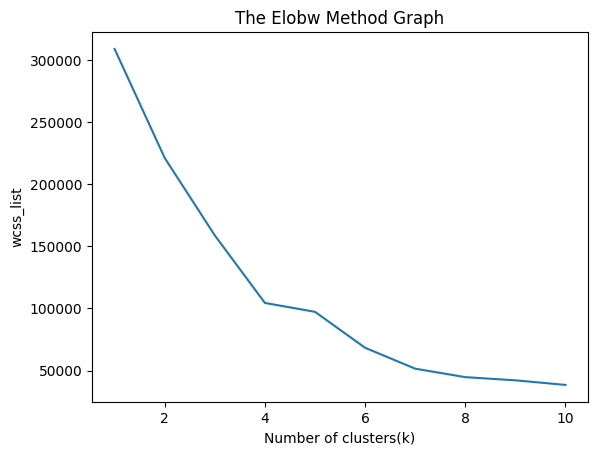

0.4052954330641215


In [ ]:
x = df.drop('CustomerID', axis=1)

# Finding optimal number of clusters using the elbow method
wcss_list= [] # Initializing the list for the values of WCSS

# Using for loop for iterations from 1 to 10.
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state= 42)
    kmeans.fit(x)
    wcss_list.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss_list)
plt.title('The Elobw Method Graph')
plt.xlabel('Number of clusters(k)')
plt.ylabel('wcss_list')
plt.show()

# Training the K-means model on a dataset
kmeans = KMeans(n_clusters=4, init='k-means++', random_state= 42)
y_predict= kmeans.fit_predict(x)

print(silhouette_score(x, y_predict))

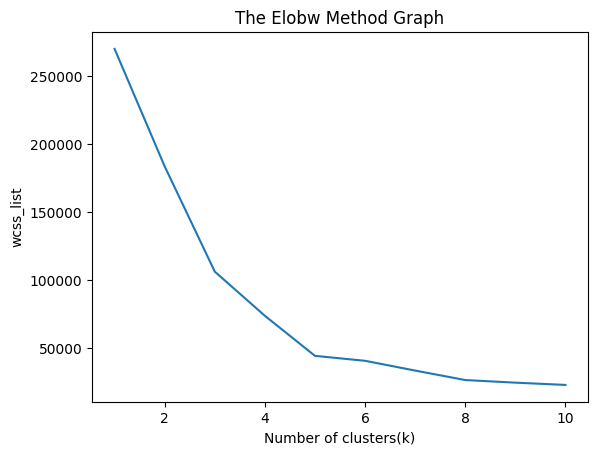

0.4993956844223334


In [30]:
x = df.drop('CustomerID', axis=1)

age_column = x[['Age']]
x = x.drop('Age', axis=1)

# Finding optimal number of clusters using the elbow method
wcss_list= [] # Initializing the list for the values of WCSS

# Using for loop for iterations from 1 to 10.
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state= 42)
    kmeans.fit(x)
    wcss_list.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss_list)
plt.title('The Elobw Method Graph')
plt.xlabel('Number of clusters(k)')
plt.ylabel('wcss_list')
plt.show()

# Normalize features for better clustering
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)

X_scaled = np.concatenate([age_column.values, X_scaled], axis=1)

# Training the K-means model on a dataset
kmeans = KMeans(n_clusters=5, init='k-means++', random_state= 42)
y_predict= kmeans.fit_predict(X_scaled)

print(silhouette_score(X_scaled, y_predict))

### The above shows that scaling the data has produced a better result

# Task 2

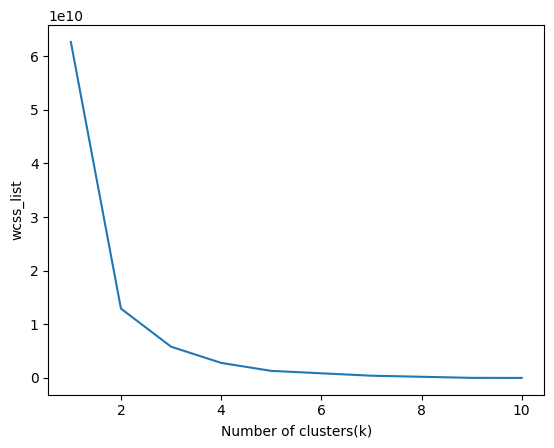

In [44]:
data = {
    'vehicle_serial_no': [5, 3, 8, 2, 4, 7, 6, 10, 1, 9],
    'mileage': [150000, 120000, 250000, 80000, 100000, 220000, 180000, 300000, 75000, 280000],
    'fuel_efficiency': [15, 18, 10, 22, 20, 12, 16, 8, 24, 9],
    'maintenance_cost': [5000, 4000, 7000, 2000, 3000, 6500, 5500, 8000, 1500, 7500],
    'vehicle_type': ['SUV', 'Sedan', 'Truck', 'Hatchback', 'Sedan', 'Truck', 'SUV', 'Truck', 'Hatchback', 'SUV']
}

df = pd.DataFrame(data)

df = df.drop('vehicle_serial_no', axis=1)

le = LabelEncoder()
df['vehicle_type'] = le.fit_transform(df['vehicle_type'])

wcss_list = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(df)
    wcss_list.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss_list)
plt.xlabel("Number of clusters(k)")
plt.ylabel("wcss_list")
plt.show()

In [43]:
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(df)

print(silhouette_score(df, clusters))

0.6022087472105685


In [49]:
vehicle_type_col = df[['vehicle_type']]
df = df.drop('vehicle_type', axis=1)

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

df_scaled = np.concatenate([vehicle_type_col.values, df_scaled], axis=1)

kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(df_scaled)

print(silhouette_score(df, clusters))

0.6264242499466519


# Task 3

In [47]:
data = {
    'student_id': [f"S{i:03}" for i in range(1, 16)],
    'GPA': [3.2, 2.8, 3.6, 3.9, 2.4, 3.1, 3.7, 2.5, 3.8, 3.0, 2.6, 3.4, 3.3, 2.7, 3.5],
    'study_hours': [12, 8, 15, 18, 5, 10, 16, 6, 17, 9, 7, 14, 13, 6, 15],
    'attendance_rate': [85, 72, 90, 95, 60, 78, 93, 65, 97, 75, 68, 88, 86, 70, 91]
}

df = pd.DataFrame(data)
df.head()

,student_id,GPA,study_hours,attendance_rate
0,S001,3.2,12,85
1,S002,2.8,8,72
2,S003,3.6,15,90
3,S004,3.9,18,95
4,S005,2.4,5,60


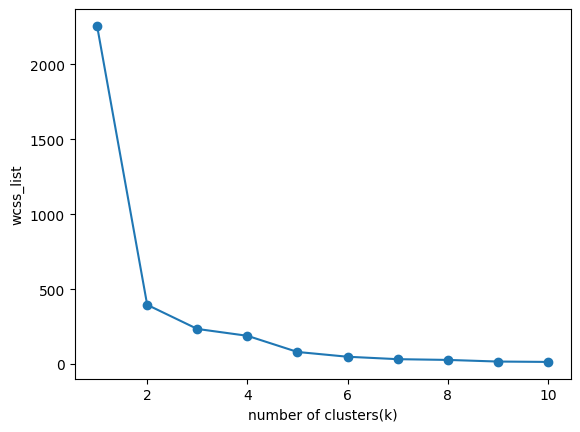

In [50]:
student_id_col = df[['student_id']]
df = df.drop('student_id', axis=1)

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

wcss_list = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(df)
    wcss_list.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss_list, marker='o')
plt.xlabel("number of clusters(k)")
plt.ylabel("wcss_list")
plt.show()

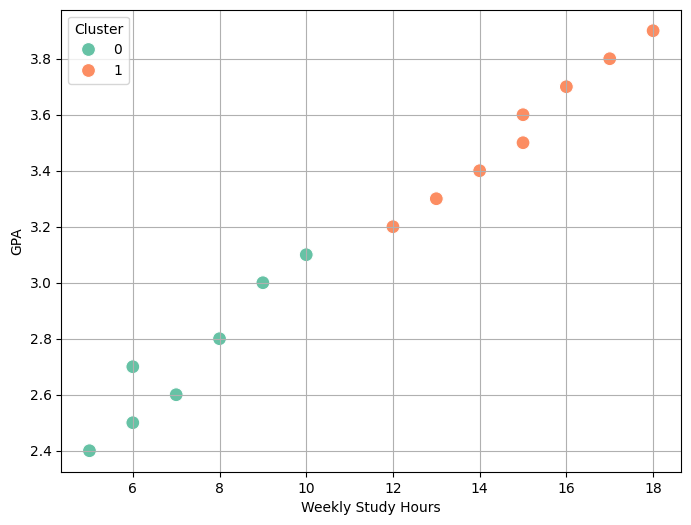

0.7173808631066138
   student_id  GPA  study_hours  attendance_rate  cluster
0        S001  3.2           12               85        1
1        S002  2.8            8               72        0
2        S003  3.6           15               90        1
3        S004  3.9           18               95        1
4        S005  2.4            5               60        0
5        S006  3.1           10               78        0
6        S007  3.7           16               93        1
7        S008  2.5            6               65        0
8        S009  3.8           17               97        1
9        S010  3.0            9               75        0
10       S011  2.6            7               68        0
11       S012  3.4           14               88        1
12       S013  3.3           13               86        1
13       S014  2.7            6               70        0
14       S015  3.5           15               91        1


In [51]:
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(df_scaled)

df['cluster'] = clusters

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x="study_hours", y="GPA", hue="cluster", palette="Set2", s=100)
plt.xlabel("Weekly Study Hours")
plt.ylabel("GPA")
plt.legend(title="Cluster")
plt.grid(True)
plt.show()

print(silhouette_score(df_scaled, clusters))
df['student_id'] = student_id_col
print(df[['student_id', 'GPA', 'study_hours', 'attendance_rate', 'cluster']])